first set up global variables and import modules... 

In [27]:
import os
import sys
import pandas as pd
from matplotlib import pyplot as plt

ukb_root = '/project_freenas/3022017.02/UKB'
sys.path.append(os.path.join(ukb_root,'scripts'))
from ukb_utils import get_variables_UKB, lookup_UKB

ukb_idp_dir = os.path.join(ukb_root,'phenotypes','current')

Now we load the dataframes 

In [34]:
# we get the sex from basic demographics
field_codes = ['eid','31-0.0']
field_names = ['eid', 'sex']
df_sex, subs = get_variables_UKB(os.path.join(ukb_idp_dir,'01_basic_demographics.csv'), field_codes, field_names)

# we load the age from the miscellaneous (because age at enrollment != age at scanning)
field_codes = ['eid', '21003-2.0', '54-2.0']
field_names = ['eid', 'age', 'site']
df_age, subs = get_variables_UKB(os.path.join(ukb_idp_dir,'99_miscellaneous.csv'), field_codes, field_names)

# join the dataframes
df = df_sex.join(df_age)

df.dropna(inplace=True)

print(df.shape)
display(df)

(48991, 3)


,sex,site,age
eid,,,
1000050,0.0,11025.0,70.0
1000432,1.0,11027.0,70.0
1000853,0.0,11025.0,73.0
1000871,1.0,11027.0,73.0
1000910,0.0,11025.0,69.0
...,...,...,...
6024957,1.0,11027.0,65.0
6025056,1.0,11025.0,71.0
6025069,1.0,11025.0,72.0


We can also look up what different fields are

In [26]:
lookup_UKB(field_ids=['25746-2.0', '25737-2.0'])

,Field,FieldID
2729,Number of dMRI outlier slices detected and cor...,25746
2720,Discrepancy between dMRI brain image and T1 br...,25737


Now load the dmri measures... 

In [28]:
df_dmri, subs = get_variables_UKB(os.path.join(ukb_idp_dir,'31_brain_IDPs.csv'), ['25746-2.0'], ['dmri_dropped_slices'])
display(df_dmri)

,dmri_dropped_slices
eid,
1000050,394.0
1000432,147.0
1000853,31.0
1000871,44.0
1000910,32.0
...,...
6024836,18.0
6024902,52.0
6025056,36.0


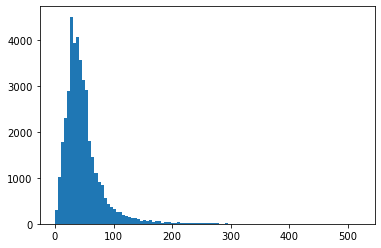

In [33]:
ax = plt.hist(df_dmri['dmri_dropped_slices'], bins =100)